<center> <img src= 'http://snapengage.com/wp-content/uploads/2020/01/what-are-chatbots.png' />

# Membuat Chatbot - Bahasa Indonesia
Chatbot merupakan aplikasi berbasis AI yang dapat memahami bahasa manusia melalui pesan teks maupun suara. Dalam hal ini kita spesifikasikan tujuan penggunaan chatbot sebagai pemandu wisata untuk Anda yang ingin menjelajah indahnya Nusantara.

## Tahap 1 - Preprocessing
* Pada proses ini kami akan mendefinisikan dataset yang digunakan beserta library untuk membangun suatu AI model pada aplikasi chatbot. 
* Sebelum memproses dataset, kita perlu melakukan preprocessing untuk menghilangkan noise dalam pesan yang masuk sehingga menjadi data siap pakai yang bersih dan digunakan sebagai referensi pembelajaran mesin.

In [1]:
pip install Sastrawi

In [2]:
import json
import re
import string

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalAveragePooling1D, Flatten
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

import random

In [3]:
with open('artour-3.json') as artour:
  data = json.load(artour)

In [4]:
tags = []
inputs = []
outputs = {}
for intent in data['intents']:
  outputs[intent['tag']]=intent['output']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [5]:
# Case Folding
def Case_Folding (users):
    a = [a.lower() for a in users]
    b = [b.strip() for b in a]
    c = [re.sub(r"\d+", "", c) for c in b]
    d = [d.translate(str.maketrans("","",string.punctuation)) for d in c] 
    return d

# Stemming
factory_stem = StemmerFactory()
stemmer = factory_stem.create_stemmer()

def stemmer_ind(users):
    pesan = [stemmer.stem(pesan) for pesan in users] 
    return pesan

# Removing Stopwords
factory_stop = StopWordRemoverFactory()
stopword = factory_stop.create_stop_word_remover()

def stopwords_ind(users):
    pesan = [stopword.remove(pesan) for pesan in users] 
    return pesan

In [6]:
user1 = Case_Folding(inputs)
user2 = stemmer_ind(user1)
user3 = stopwords_ind(user2)

# Mengganti isi inputs dengan data preprocessing user
inputs = user3

In [7]:
print(inputs)

['hi', 'halo', 'hello', 'hallo', 'hey', 'hai', 'hay', 'apa kabar', 'bagaimana kabar', 'gimana kabar', 'apa hari baik', 'bagaimana hari', 'apa hari senang', 'kabar baik', 'siapa nama', 'siapa kamu', 'nama kamu siapa', 'panggil kamu siapa', 'bagaimana bisa panggil', 'cara panggil', 'nama siapa', 'artour', 'artour', 'artour', 'artour', 'artour sini', 'ada artour', 'online', 'artour online', 'artour on', 'candi prambanan', 'apa candi prambanan', 'candi prambanan rupa', 'candi prambanan', 'candi prambanan ialah', 'erti candi prambanan', 'apa oleholeh prambanan', 'oleholeh', 'souvenir', 'souvenir prambanan', 'oleholeh prambanan', 'bagaimana cara prambanan kereta', 'stasiun yogyakarta prambanan', 'bagaimana cara prambanan stasiun', 'stasiun', 'prambanan stasiun', 'kereta', 'naik kereta', 'bagaimana cara prambanan bus', 'cara prambanan pakai bus', 'bagaimana cara prambanan naik bus', 'bus', 'naik bus', 'bus kota', 'trans jogja', 'bagaimana cara prambanan bandara', 'cara prambanan bandara yogya

## Tahap 2 - Model Training
> Menggunakan framework Tensorflow yang digunakan sebagai arsitektur model Machine Learning serta disesuaikan dengan domain untuk membuat chatbot yaitu Natural Language Processing

In [8]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(inputs)
train = tokenizer.texts_to_sequences(inputs)

In [9]:
le = LabelEncoder()
x_train = pad_sequences(train)
y_train = le.fit_transform(tags)

In [10]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  116
output length:  20


In [11]:
# Variabel ini untuk apa btw?
input_shape = x_train.shape[1]
print(input_shape)

6


In [12]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i,x)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 embedding (Embedding)       (None, 6, 10)             1170      
                                                                 
 lstm (LSTM)                 (None, 6, 10)             840       
                                                                 
 flatten (Flatten)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 20)                1220      
                                                                 
Total params: 3,230
Trainable params: 3,230
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train = model.fit(x_train, y_train, epochs=300)

Epoch 1/300
5/5 [==============================] - 3s 8ms/step - loss: 2.9971 - accuracy: 0.0268
Epoch 2/300
5/5 [==============================] - 0s 7ms/step - loss: 2.9939 - accuracy: 0.0336
Epoch 3/300
5/5 [==============================] - 0s 7ms/step - loss: 2.9912 - accuracy: 0.1477
Epoch 4/300
5/5 [==============================] - 0s 8ms/step - loss: 2.9888 - accuracy: 0.1342
Epoch 5/300
5/5 [==============================] - 0s 6ms/step - loss: 2.9859 - accuracy: 0.1477
Epoch 6/300
5/5 [==============================] - 0s 7ms/step - loss: 2.9830 - accuracy: 0.1544
Epoch 7/300
5/5 [==============================] - 0s 7ms/step - loss: 2.9801 - accuracy: 0.1477
Epoch 8/300
5/5 [==============================] - 0s 7ms/step - loss: 2.9763 - accuracy: 0.1477
Epoch 9/300
5/5 [==============================] - 0s 8ms/step - loss: 2.9723 - accuracy: 0.1409
Epoch 10/300
5/5 [==============================] - 0s 7ms/step - loss: 2.9678 - accuracy: 0.1342
Epoch 11/300
5/5 [===========

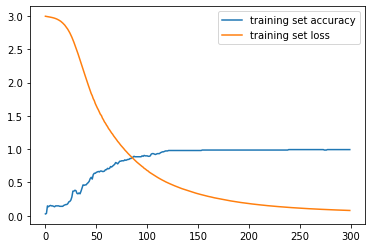

In [15]:
plt.plot(train.history['accuracy'], label='training set accuracy')
plt.plot(train.history['loss'], label='training set loss')
plt.legend()

In [16]:
save_model = "Artour"
tf.saved_model.save(model, save_model)

INFO:tensorflow:Assets written to: Artour/assets


INFO:tensorflow:Assets written to: Artour/assets


In [17]:
model.save("Artour.h5")

## Tahap 3 - Build a Chatbot
>Menguji hasil prediksi chatbot yang sudah dilatih sebelumnya dengan pesan input yang baru.

In [18]:
# def chatbot_response(user):
    
#     # Preprocessing input_user
#     step_1 = Case_Folding(user)
#     step_2 = stemmer_ind(step_1)
#     step_3 = stopwords_ind(step_2)

#     # Tokenizing input_user
#     token = tokenizer.texts_to_sequences([step_3])
#     kalimat = pad_sequences(token,input_shape)

#     # Predicting bot response
#     output = model.predict(kalimat)
#     response_tag = le.inverse_transform([output])[0]
#     return (print("ARTour : ", random.choice(outputs[response_tag])))

In [21]:
print("ARTour Bot : Halo! Senang bertemu denganmu. Ketikan 'keluar' apabila ingin mengakhiri percakapan")
exit_list=['see u']

while(True):
    teks = []
    user_input = input('You        : ')

    if user_input.lower() in exit_list:
        print('ARTour Bot : Terimakasih telah berkunjung. Selamat menikmati liburan Anda !')
        break
    else:
        step_1 = Case_Folding(teks)
        step_2 = stemmer_ind(step_1)
        step_3 = stopwords_ind(step_2)

        token = tokenizer.texts_to_sequences([step_3])
        kalimat = pad_sequences(token,input_shape)

        output = model.predict(kalimat)
        output = output.argmax()

        response_tag = le.inverse_transform([output])[0]
        # print(f"ARTour Bot : {output}")
        print("ARTour Bot :", random.choice(outputs[response_tag]))

ARTour Bot : Halo! Senang bertemu denganmu. Ketikan 'keluar' apabila ingin mengakhiri percakapan
You        : halo
ARTour Bot : Ada yang ingin kamu tanyakan, ARTourist?
You        : bye
ARTour Bot : Ada apa ARTourist?
You        : see u
ARTour Bot : Terimakasih telah berkunjung. Selamat menikmati liburan Anda !
